<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [79]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='load_data'></a>
# 2. Read Data

In [80]:
# read excel data file using pandas
df_power = pd.read_csv('wine.xls',sep=',')

# head() to display top five rows
df_power.head()

# Note: To display more rows, example 10, use head(10)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


<a id='EDA'></a>
# 3. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building models. <br><br>
                        Here we analyze the data with the following steps:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns<br>
                        2. Check the data type. Refer data definition to validate the data type  <br>
                        3. Check the distribution of variables<br>
                        4. Check for the outliers
                        5. Study summary statistics<br>
                        6. Check for missing values<br>
                        7. Scale the data<br><br>
                        Note: it is an art to explore the data and one needs more and more practice to gain expertise in this area.
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Understanding_Variables'></a>
## 3.1 Understand the Dataset

#### Dimensions of the data

In [81]:
# 'shape' function gives the total number of rows and columns in the data
df_power.shape

(177, 14)

<a id='change_datatype'></a>
## 3.2 Data Type 

The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numerical variables should have data type 'int64' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [82]:
# 'dtypes' gives the datatype for each column
df_power.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> All the variables have the data type as per the data definition. Thus, there is no need for type conversion.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dis'></a>
## 3.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

As all the variables are numerical, we plot the boxplot for each variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables.

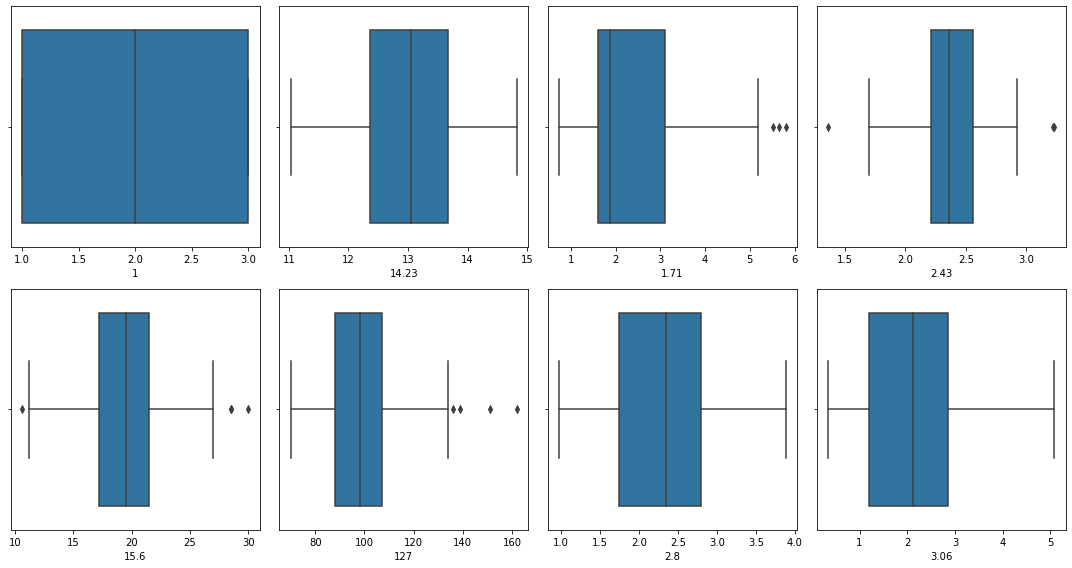

In [83]:
# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_power.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_power[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<a id='out'></a>
## 3.4 Analysis of Outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

The data distribution in the previous section exhibits the presence of outliers in the data. Now let us use the IQR method to remove these observations and plot the boxplots to recheck the presence of outliers.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To treat the outliers in the data, we perform the following:<br><br>
                    1. Remove outliers by IQR method<br> 
                    2. Plot the boxplot to recheck for outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Remove outliers by IQR method**

**2. Plot the boxplot to recheck for outliers**

<a id='stat'></a>
## 3.5  Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Check the statistical summary of all the variables.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_power.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<a id='missing_values'></a>
## 3.6 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us plot the heatmap to visualize the missing values in the data.

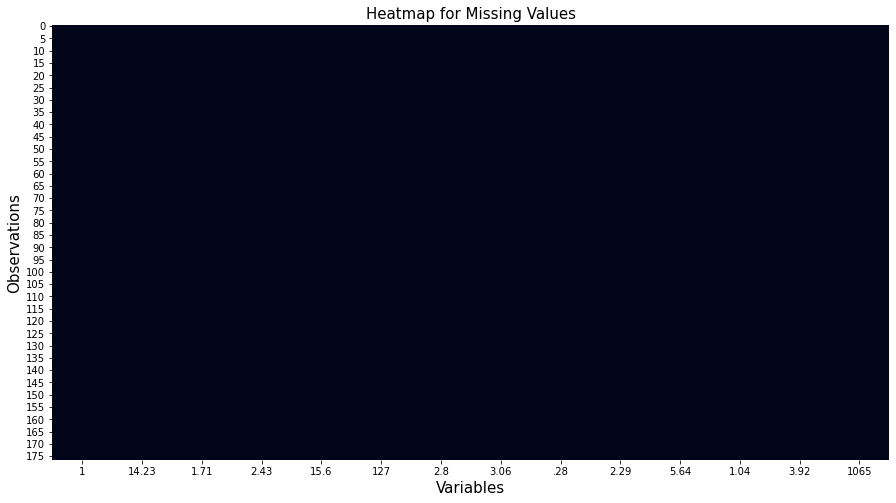

In [85]:
# plot heatmap to check null values
# the 'isnull()' returns the boolean output with value 'True' for the mising entry
# 'cbar = False' does not show the color axis 
sns.heatmap(df_power.isnull(), cbar=False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that there are no missing values in the data. <br><br> Note: The heatmap represents the missing values with the horizontal non-black colored lines across the observation and the variable that contain missing data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='preparation_of_data'></a>
## 3.7 Prepare the Data

Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result. 

The two most discussed scaling methods are min-max normalization and z-score normalization (aka standardization). 

**Scale the data**

Here let us use the z-score normalization (i.e. standardization) technique to scale the dataset. In the scaled data, each variable will have a mean 0 and a standard deviation of 1.

In [86]:
# create a copy of the original dataset 
features = df_power.copy()

# head() to display top five rows
features.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [87]:
# instantiate the 'StandardScaler()'
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data 
features = scaler.fit_transform(features)     

# create a dataframe of the scaled features 
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = df_power.columns)
                               
# head() to display top five rows
features_scaled.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus, we have scaled all the features in the data and stored it in a dataframe 'features_scaled'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='kmeans'></a>
# 4. K-means Clustering

K-means is the most widely-used centroid-based clustering algorithm. In this method, we need to prespecify the number of clusters to the algorithm. This method tends to build more circular clusters.

Let us first identify the optimal number of clusters and analyze the obtained clusters.

<a id='k'></a>
## 4.1 Identify the Optimal Number of Clusters

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the elbow plot and identify the optimal number of clusters. Also, use the silhouette score method to validate the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We do not know how many clusters give the most useful results. So, we create the clusters with varying K, from 1 to 7 and then decide the optimum number of clusters (K) with the help of the elbow plot.

In [88]:
# create several cluster combinations ranging from 1 to 7 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

Let us plot the elbow plot and identify the elbow point.

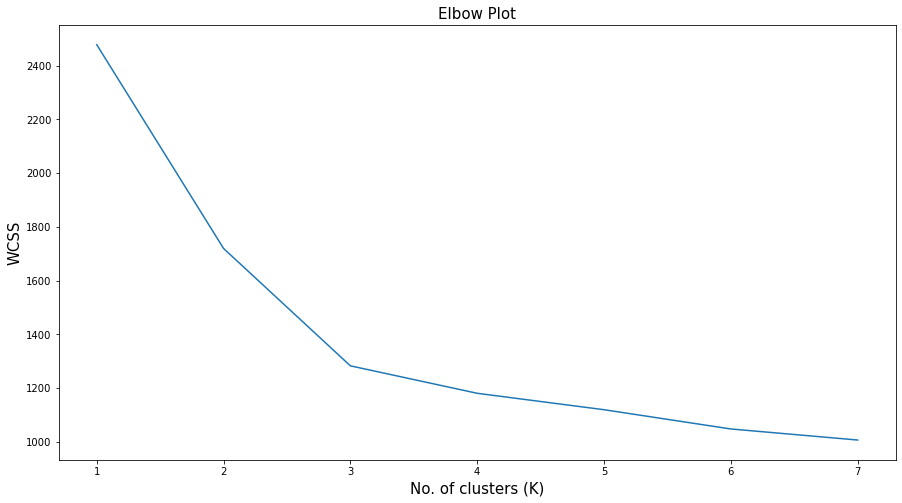

In [89]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can consider the K = 2 or 3 as the optimal number of clusters; as after these values, the WCSS is not decreasing rapidly. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Since the elbow point is not clearly visible, we can also use the `KneeLocator()` from the 'kneed' library in python. This function returns the point of maximum curvature (i.e. elbow/knee point).

In [29]:
!pip install kneed

In [90]:
# import the 'KneeLocator' 
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction' 
k = KneeLocator(x  = range(1,8), y = wcss, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature 
k.elbow

3

The python in-built elbow locator function returns K = 3 as the optimal value for the number of clusters.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Use the silhouette score method to validate the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us find the silhouette score with different values of K from 2 to 7. We consider the optimal value of K for which the silhouette score is maximum.

**Note:** Since the silhouette score considers the inter-cluster and intra-cluster distance, we never set K = 1.

In [91]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7]

# use 'for' loop to build the clusters with different K
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # pass the scaled data and predicted labels to the 'silhouette_score()'
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.2862732939850227)
For n_clusters = 3, silhouette score is 0.3064946479323389)
For n_clusters = 4, silhouette score is 0.27879829292012065)
For n_clusters = 5, silhouette score is 0.25096104162453015)
For n_clusters = 6, silhouette score is 0.25340462738639896)
For n_clusters = 7, silhouette score is 0.1875467807028502)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The optimum value for K is associated with the highest value of the silhouette score. From the above output it can be seen that, for K = 3, the score is the highest.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



From the elbow plot and silhouette score method, we can consider the optimal number of clusters as 3. 

Now let us group the dataset into 3 clusters.

<a id='kmodel'></a>
## 4.2 Build the Model

Let us group the dataset into 3 clusters and check the number of elements in each cluster.

In [96]:
# build a K-Means model for K = 3
# pass the 'random_state' to obtain the same centroid initialization for each code run
K_model = KMeans(n_clusters= 3, random_state= 10)

# fit the model on the scaled data
K_model.fit(features_scaled)

KMeans(n_clusters=3, random_state=10)

In [97]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
df_power['Kmeans_label'] = K_model.labels_

# use the 'head()' to display top five rows
df_power.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0


The new column of cluster label added to the dataframe that indicates the cluster number for each observation.

#### Check the size of each cluster

In [98]:
# the 'unique()' returns the number of distinct clusters
# the 'return_counts = True' gives the number observation in each cluster
np.unique(K_model.labels_, return_counts=True)                

(array([0, 1, 2]), array([60, 68, 49], dtype=int64))

In [99]:
df_power["Kmeans_label"].value_counts()

1    68
0    60
2    49
Name: Kmeans_label, dtype: int64

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot a barplot to visualize the cluster sizes. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

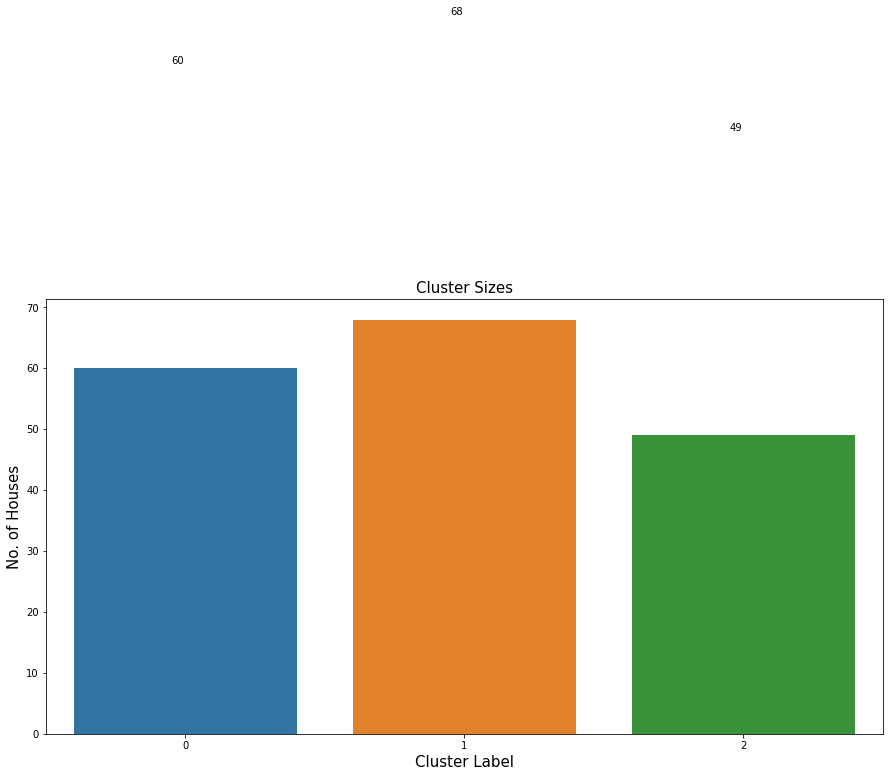

In [100]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_power, x = 'Kmeans_label')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Houses', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y = np.unique(K_model.labels_, return_counts=True)[1][0] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][0])

plt.text(x = 0.95, y = np.unique(K_model.labels_, return_counts=True)[1][1] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][1])

plt.text(x = 1.95, y = np.unique(K_model.labels_, return_counts=True)[1][2] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][2])

# display the plot
plt.show()

#### Cluster centers

Let us find the center of each cluster. The center of an cluster is a n-dimensional vector where there are n variables in the clustering model. An element of the vector corresponds to the average of all the observations in that cluster for a variable.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Find the center of each cluster. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# form a dataframe containing cluster centers
# the 'cluster_centers_' returns the co-ordinates of the center of each cluster 
centers = pd.DataFrame(K_model.cluster_centers_, columns =  (df_power.drop('Kmeans_label', axis=1)).columns)      

# display the cluster centers
centers

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,-1.179279,0.879285,-0.302875,0.320845,-0.663418,0.557460,0.881351,0.948172,-0.587151,0.578817,0.166761,0.486608,0.764756,1.166598
1,0.073202,-0.916970,-0.381331,-0.463141,0.169079,-0.462961,-0.069297,0.050145,0.005026,0.025221,-0.858588,0.425507,0.262030,-0.759595
2,1.342429,0.195854,0.900062,0.249855,0.577709,-0.040128,-0.983038,-1.230616,0.711985,-0.743757,0.987313,-1.186347,-1.300070,-0.374355


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>A row in the above dataframe represents the center of a single cluster. Each element in the row corresponds to the average of the column variable.</b>
              </font>
            </div>
        </td>
    </tr>
</table>

The above cluster centers are corresponding to the scaled data. Now let us obtain the centers for the original data. This will be helpful to analyze the clusters in terms of the business case.

In [102]:
# the 'scaler' is the standard scaler fitted on the original data
# use 'inverse_transform()' to get the cluster centers for the original (unscaled) data
# pass the scaled cluster centers to apply inverse transformation
# create a dataframe of these cluster centers
# pass the required column names to the parameter, 'columns'
unscaled_centers = pd.DataFrame(scaler.inverse_transform(K_model.cluster_centers_), 
                                columns =  (df_power.drop('Kmeans_label', axis=1)).columns)      

# display the dataframe
unscaled_centers

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1.033333,13.702833,2.001833,2.454167,17.310000,107.466667,2.842833,2.967667,0.289333,1.916833,5.441333,1.068167,3.142000,1111.400000
1,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above dataframe represents the cluster centers with respect to the original (unscaled) data. Let us consider the center of the second cluster: <br><br>
                    1. The average global active power of the houses in this cluster is 2.1112 KW. <br>
                    2. The average global reactive power of the houses in this cluster is 0.2396 KW.<br>
                    3. The average voltage of the houses in this cluster is 238.7924 volt.<br>
                    4. The average  global intensity of the houses in this cluster is 8.9337 ampere.<br>
                    5. On average, kitchen appliances in these houses consume 1.8035 watt-hours of power.<br>
                    6. On average, the laundry appliances in these houses consume 2.6923 watt-hours of power.<br>
                    7. On average, the other appliances in these houses consume 17.6563 watt-hours of power.</b>
              </font>
            </div>
        </td>
    </tr>
</table>

<a id='clusters'></a>
## 4.3 Analyze the Clusters

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Here we analyze and interpret the clusters formed by K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Compute the statistical summary of the observations in the 1st cluster.**

In [103]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Kmeans_label == 0].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,1.033333,13.702833,2.001833,2.454167,17.310000,107.466667,2.842833,2.967667,0.289333,1.916833,5.441333,1.068167,3.142000,1111.400000,0.0
std,0.181020,0.491284,0.685930,0.228423,3.029275,13.054601,0.344177,0.404657,0.070323,0.443203,1.313743,0.120402,0.349211,221.377827,0.0
min,1.000000,12.470000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,2.600000,0.820000,2.510000,680.000000,0.0
25%,1.000000,13.297500,1.657500,2.287500,16.000000,98.000000,2.600000,2.680000,0.247500,1.650000,4.470000,1.002500,2.865000,981.250000,0.0
50%,1.000000,13.735000,1.765000,2.445000,17.000000,104.500000,2.825000,2.955000,0.290000,1.895000,5.325000,1.070000,3.135000,1087.500000,0.0
75%,1.000000,14.070000,1.927500,2.612500,18.825000,115.000000,3.000000,3.242500,0.320000,2.085000,6.212500,1.135000,3.410000,1280.000000,0.0
max,2.000000,14.830000,4.040000,3.220000,30.000000,162.000000,3.880000,3.930000,0.500000,3.280000,8.900000,1.310000,4.000000,1680.000000,0.0


**Compute the statistical summary of the observations in the 2nd cluster.**

In [104]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Kmeans_label == 1].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label
count,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,2.0,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235,1.0
std,0.0,0.533642,1.009061,0.319289,3.190029,13.863335,0.536710,0.711586,0.121521,0.579328,0.919199,0.202986,0.490572,140.771990,0.0
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000,1.0
25%,2.0,11.862500,1.240000,1.997500,18.000000,85.750000,1.897500,1.607500,0.270000,1.350000,2.500000,0.927500,2.440000,402.500000,1.0
50%,2.0,12.270000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.560000,2.900000,1.040000,2.835000,484.000000,1.0
75%,2.0,12.450000,2.137500,2.420000,21.700000,98.250000,2.560000,2.462500,0.430000,1.870000,3.400000,1.197500,3.160000,625.000000,1.0
max,2.0,13.860000,5.800000,3.230000,28.500000,151.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,886.000000,1.0


**Compute the statistical summary of the observations in the 3rd cluster.**

In [105]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Kmeans_label == 2].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,2.0
std,0.142857,0.524898,1.079136,0.183520,2.239868,10.968686,0.353257,0.312557,0.125014,0.410006,2.316626,0.115451,0.273271,115.068469,0.0
min,2.000000,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.170000,0.550000,3.850000,0.480000,1.270000,415.000000,2.0
25%,3.000000,12.810000,2.590000,2.300000,20.000000,89.000000,1.410000,0.580000,0.400000,0.860000,5.400000,0.590000,1.510000,530.000000,2.0
50%,3.000000,13.160000,3.270000,2.380000,21.000000,97.000000,1.650000,0.690000,0.470000,1.110000,7.500000,0.670000,1.680000,625.000000,2.0
75%,3.000000,13.500000,3.910000,2.600000,23.000000,106.000000,1.800000,0.920000,0.530000,1.350000,9.200000,0.760000,1.820000,695.000000,2.0
max,3.000000,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.590000,0.630000,2.700000,13.000000,0.960000,2.470000,880.000000,2.0


<a id='hie'></a>
# 5. Hierarchical Clustering

<a id='n'></a>
## 5.1 Identify the Optimal Number of Clusters

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a dendrogram to identify the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Let us first calculate the linkage matrix.**

This matrix represents the distance at which the smaller clusters merge to form a larger cluster.

In [106]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[  8.          46.           1.16352198   2.        ]
 [130.         132.           1.19092885   2.        ]
 [ 10.          11.           1.21060557   2.        ]
 [ 14.          52.           1.2240785    2.        ]
 [ 91.         106.           1.24642893   2.        ]
 [ 33.          36.           1.27485683   2.        ]
 [ 15.          16.           1.29277123   2.        ]
 [163.         171.           1.30013115   2.        ]
 [ 19.          55.           1.33030317   2.        ]
 [ 21.          28.           1.33777505   2.        ]]


**Plot the dendrogram using the above linkage matrix.**

A dendrogram represents the order and distances of merges during the hierarchical clustering. The structure of the dendrogram depends on the linkage method used to calculate the distance between the clusters.

We use the dendrogram to find the optimal number of clusters. The number of clusters 'K' that remains constant for the larger distance on the dendrogram represents the optimal value.

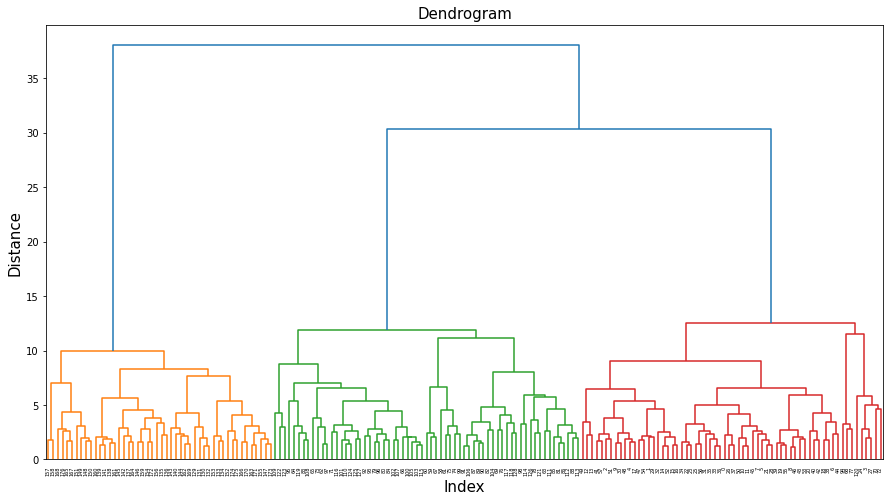

In [107]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 60
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 60:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

We can group the dataset into 3 or 4 clusters to gain more insights from the data. We can also use the silhouette method to identify the optimal number of clusters, as we did for the K-means clustering. 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Consider the silhouette score method to identify the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us plot the silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of clusters (K).

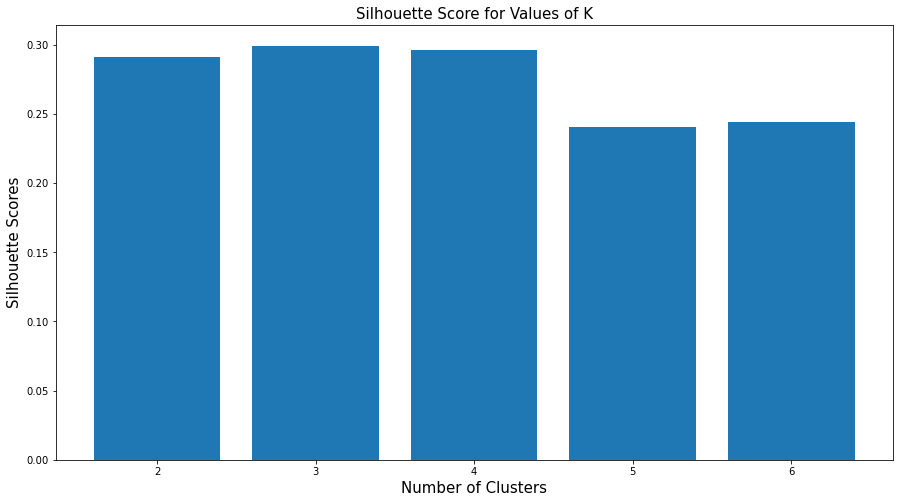

In [108]:
# consider different values of K
K = [2, 3, 4, 5, 6]

# consider an empty list tot store the silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    # use the 'ward' linkage method (same as the dendrogram)
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    
    # calculate the silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled))) 
    
# plot the silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above bar plot shows that the silhouette score for K = 3 is the highest. 
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Now let us group the dataset into 3 clusters and analyze them.

<a id='hie_model'></a>
## 5.2 Build the Model

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build the hierarchical clustering model with 3 clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the `AgglomerativeClustering()` to build the 3 clusters with the `ward` linkage method.

In [109]:
# instantiate clustering method with 3 clusters and 'ward' linkage method
hierar_clusters = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

# fit the model on the scaled data
hierar_clusters.fit(features_scaled)

AgglomerativeClustering(n_clusters=3)

In [110]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_power['Hierar_label'] = hierar_clusters.labels_

# print head() of the dataframe
df_power.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0,0


#### Check the number of houses in each cluster.

In [111]:
# use the 'value_counts()' to get the number of houses in each cluster
df_power['Hierar_label'].value_counts()

2    65
0    64
1    48
Name: Hierar_label, dtype: int64

<a id='retrieve_clusters'></a>
## 5.3 Analyze the Clusters

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Let us analyze and interpret the clusters formed by hierarchical clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Compute the statistical summary of the observations in the 1st cluster.**

In [112]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 0].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,1.093750,13.627031,1.966406,2.450781,17.557813,108.437500,2.819531,2.955156,0.289531,1.937656,5.345469,1.073750,3.136719,1078.546875,0.062500,0.0
std,0.293785,0.598969,0.685522,0.266555,3.400271,14.528434,0.376999,0.537809,0.075244,0.447514,1.360931,0.126146,0.360582,252.529170,0.243975,0.0
min,1.000000,11.560000,0.990000,1.750000,11.200000,86.000000,1.850000,1.280000,0.140000,1.250000,2.600000,0.820000,2.310000,410.000000,0.000000,0.0
25%,1.000000,13.270000,1.647500,2.280000,16.000000,98.000000,2.600000,2.672500,0.240000,1.660000,4.350000,1.002500,2.865000,918.750000,0.000000,0.0
50%,1.000000,13.725000,1.755000,2.445000,17.000000,105.500000,2.825000,2.930000,0.290000,1.895000,5.245000,1.070000,3.130000,1062.500000,0.000000,0.0
75%,1.000000,14.060000,1.927500,2.620000,18.925000,116.000000,3.000000,3.242500,0.320000,2.110000,6.200000,1.152500,3.410000,1272.500000,0.000000,0.0
max,2.000000,14.830000,4.040000,3.230000,30.000000,162.000000,3.880000,5.080000,0.500000,3.280000,8.900000,1.360000,4.000000,1680.000000,1.000000,0.0


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are 9025 houses in this cluster, which makes this the largest cluster. Here the houses that have the highest average consumption of appliances other than the kitchen and laundry room are grouped. We can see that 50% of the houses have only 1 watt-hour power consumption in the kitchen and the laundry room. The global active power is between 0.3 to 6.1 KW, which is less than the other clusters. The average intensity of the current is the lowest for these houses. <br><br> Most of the points in this cluster are grouped into the largest cluster (cluster with label '1') of the K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Compute the statistical summary of the observations in the 2nd cluster.**

In [113]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 1].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833,2.0,1.0
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043,0.0,0.0
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000,2.0,1.0
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000,2.0,1.0
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000,2.0,1.0
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000,2.0,1.0
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000,2.0,1.0


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are 3268 houses in this cluster, which makes this the smallest cluster. Here the houses that have the highest average consumption of the laundry room appliances are grouped. We can see that 50% of the houses have kitchen appliances that consume only 1 watt-hour power. The global active power is between 1.56 to 7.7 KW. On average, the other appliances in these houses are consuming 17 watt-hours of power. The average intensity of the current is the highest for the houses in this cluster. <br><br> 75% of the observations in this cluster are grouped into the smallest cluster (cluster with label '0') of the K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Compute the statistical summary of the observations in the 3rd cluster.**

In [114]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 2].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label
count,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,2.0,12.251846,1.973692,2.230462,20.043077,91.076923,2.226154,2.023231,0.371077,1.561692,3.039538,1.044554,2.760000,501.846154,1.015385,2.0
std,0.0,0.509972,1.047432,0.288901,2.941724,10.279390,0.530117,0.607994,0.122565,0.560278,0.890104,0.203121,0.490832,137.575460,0.124035,0.0
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000,1.000000,2.0
25%,2.0,11.870000,1.290000,2.000000,18.000000,85.000000,1.890000,1.600000,0.280000,1.350000,2.500000,0.906000,2.440000,392.000000,1.000000,2.0
50%,2.0,12.290000,1.630000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.530000,2.900000,1.020000,2.810000,488.000000,1.000000,2.0
75%,2.0,12.510000,2.400000,2.400000,21.600000,98.000000,2.550000,2.290000,0.430000,1.830000,3.400000,1.190000,3.140000,607.000000,1.000000,2.0
max,2.0,13.670000,5.800000,2.920000,28.500000,134.000000,3.520000,3.750000,0.660000,3.580000,5.750000,1.710000,3.640000,886.000000,2.000000,2.0


<a id='dbscan'></a>
# 6. DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-base clustering method. This method can be used to create non-linear clusters. The method considers the high-density regions as clusters. This method is effective in identifying the noise/ outliers in the data.

<a id='model'></a>
## 6.1 Build the Model

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build the DBSCAN model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
# consider the array of euclidean distnce between the scaled data points
# the 'euclidean_distances()' returns the distance matrix which is symmetric
# consider only the upper-triangular elements, 'k=1' drops the diagonal elements
dist_array = euclidean_distances(features_scaled)[np.triu_indices(161, k = 1)]

# calculate the minimum euclidean distance between the data points 
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points 
print('Maximum Distance:', dist_array.max())

Minimum Distance: 1.1635219769514085
Maximum Distance: 11.210715092006213


We know that the `epsilon` and `minimum sample points` are the two parameters of the DBSCAN. 

As the distance between the points is in the range 0 to 10, we consider the epsilon as 0.5, and while increasing the epsilon, we get 4 clusters at epsilon = 1.4; after 1.4, we get a single cluster. 

Thus, let us consider the epsilon as 1.4, i.e. a point will be in the neighbourhood of another point if the euclidean distance between them is not more than 1.4. Also, there should be a minimum of 4 points in the neighbourhood of a core point (including itself).

In [126]:
# instantiate DBSCAN with epsilon and minimum points 
# pass the epsilon value as 2.5
# pass the number of minimum points as 4
dbscan_model = DBSCAN(eps = 2.5, min_samples = 4)

# fit the model on the scaled data
dbscan_model.fit(features_scaled)

DBSCAN(eps=2.5, min_samples=4)

#### Check the number of clusters formed by DBSCAN.

In [127]:
# display the labels of unique clusters formed by DBSCAN
(set(dbscan_model.labels_))

{-1, 0, 1}

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above output shows that the DBSCAN algorithm has created 4 clusters. The data points labeled as `-1` represent the noise in the data. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_power['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
df_power.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label,DBSCSAN_label
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,0
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,0
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0,0
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,0
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0,0,0


#### Check the number of houses in each cluster.

In [129]:
# use the 'value_counts()' to get the number of houses in each cluster
df_power['DBSCSAN_label'].value_counts()

 0    105
 1     46
-1     26
Name: DBSCSAN_label, dtype: int64

<a id='analyze_clusters'></a>
## 6.2 Analyze the Clusters

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Let us analyze and interpret the clusters formed by DBSCAN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Compute the statistical summary of the observations in the 1st cluster.**

In [130]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 0].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label,DBSCSAN_label
count,105.000000,105.000000,105.000000,105.000000,105.00000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,1.457143,13.069238,1.880476,2.348857,18.51619,98.104762,2.56419,2.569714,0.320571,1.732476,4.392476,1.056286,3.016286,832.657143,0.466667,0.914286,0.0
std,0.500549,0.878402,0.729487,0.266243,2.87620,12.619371,0.53089,0.643425,0.095312,0.406554,1.628603,0.148436,0.402027,363.139564,0.520108,1.001098,0.0
min,1.000000,11.410000,0.740000,1.700000,11.20000,70.000000,1.38000,1.250000,0.130000,0.730000,1.280000,0.690000,2.010000,278.000000,0.000000,0.000000,0.0
25%,1.000000,12.290000,1.510000,2.190000,16.50000,88.000000,2.20000,2.040000,0.260000,1.430000,3.050000,0.940000,2.770000,495.000000,0.000000,0.000000,0.0
50%,1.000000,13.160000,1.730000,2.320000,18.50000,97.000000,2.60000,2.650000,0.300000,1.660000,4.360000,1.050000,3.000000,795.000000,0.000000,0.000000,0.0
75%,2.000000,13.770000,1.950000,2.520000,20.50000,107.000000,2.95000,3.030000,0.370000,1.980000,5.430000,1.160000,3.330000,1105.000000,1.000000,2.000000,0.0
max,2.000000,14.830000,4.300000,3.220000,26.00000,132.000000,3.88000,3.930000,0.660000,2.960000,8.900000,1.450000,4.000000,1680.000000,2.000000,2.000000,0.0


**Compute the statistical summary of the observations in the 2nd cluster.**

In [131]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 1].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label,DBSCSAN_label
count,46.0,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.0
mean,3.0,13.120870,3.40587,2.426957,21.315217,99.565217,1.634348,0.763043,0.444130,1.095217,7.179783,0.687609,1.675435,629.456522,2.0,1.0,1.0
std,0.0,0.508832,1.05287,0.181853,2.236959,11.018474,0.290308,0.284893,0.125761,0.298751,2.100205,0.114410,0.274523,117.531217,0.0,0.0,0.0
min,3.0,12.200000,1.24000,2.100000,17.500000,80.000000,0.980000,0.340000,0.170000,0.550000,3.850000,0.480000,1.270000,415.000000,2.0,1.0,1.0
25%,3.0,12.795000,2.69250,2.300000,20.000000,90.250000,1.402500,0.580000,0.392500,0.845000,5.412500,0.592500,1.510000,535.000000,2.0,1.0,1.0
50%,3.0,13.135000,3.28500,2.380000,21.000000,97.000000,1.620000,0.680000,0.460000,1.080000,7.400000,0.670000,1.635000,627.500000,2.0,1.0,1.0
75%,3.0,13.497500,4.05250,2.570000,22.875000,106.000000,1.800000,0.837500,0.530000,1.290000,8.922500,0.757500,1.815000,695.000000,2.0,1.0,1.0
max,3.0,14.160000,5.65000,2.860000,27.000000,123.000000,2.320000,1.570000,0.630000,1.870000,10.800000,0.960000,2.470000,880.000000,2.0,1.0,1.0


**Compute the statistical summary of the noise/ outliers.**

In [133]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == -1].describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,Kmeans_label,Hierar_label,DBSCSAN_label
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,2.038462,12.463462,2.309231,2.328462,20.376923,105.615385,2.358077,2.047308,0.386154,1.869231,3.970000,1.032538,2.583846,596.076923,0.961538,1.384615,-1.0
std,0.344182,0.763801,1.277814,0.410811,4.899413,22.052804,0.572028,0.987844,0.151343,0.913639,2.772952,0.271168,0.625473,211.383996,0.445490,0.897861,0.0
min,1.000000,11.030000,0.940000,1.360000,10.600000,80.000000,1.100000,0.570000,0.140000,0.410000,1.900000,0.570000,1.590000,365.000000,0.000000,0.000000,-1.0
25%,2.000000,11.847500,1.510000,2.062500,16.850000,88.250000,1.920000,1.285000,0.250000,1.152500,2.600000,0.909500,2.000000,420.000000,1.000000,0.250000,-1.0
50%,2.000000,12.350000,1.705000,2.255000,20.200000,101.000000,2.480000,2.080000,0.430000,1.910000,3.025000,1.000000,2.575000,541.000000,1.000000,2.000000,-1.0
75%,2.000000,12.935000,3.100000,2.662500,22.875000,111.500000,2.822500,2.632500,0.520000,2.650000,3.400000,1.220000,3.092500,708.500000,1.000000,2.000000,-1.0
max,3.000000,14.340000,5.800000,3.230000,30.000000,162.000000,3.300000,5.080000,0.630000,3.580000,13.000000,1.710000,3.690000,1150.000000,2.000000,2.000000,-1.0


<a id='visual'></a>
# 7. Visualize the Clusters

In the previous sections, we clustered the dataset into different groups using three different methods. However, since the dimension of the dataset is greater than 3, clusters are difficult to visualize. 

Thus, to avoid this issue, we use the principal component analysis (PCA) to reduce the dimension of the original data. This helps us visualize the clusters that have been formed using different algorithms.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Perform PCA and obtain 2 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,2.551769,0.301013
1,2.803540,-1.064472
2,3.927293,-2.809760
3,1.422861,-0.887657
4,3.293710,-2.172936


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above dataframe contains 2 principal components obtained from the original data. Here we have reduced the number of variables from 7 to 2.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Now let use these principal components to visualize the dataset.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Visualize the clusters formed using various clustering algorithms.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

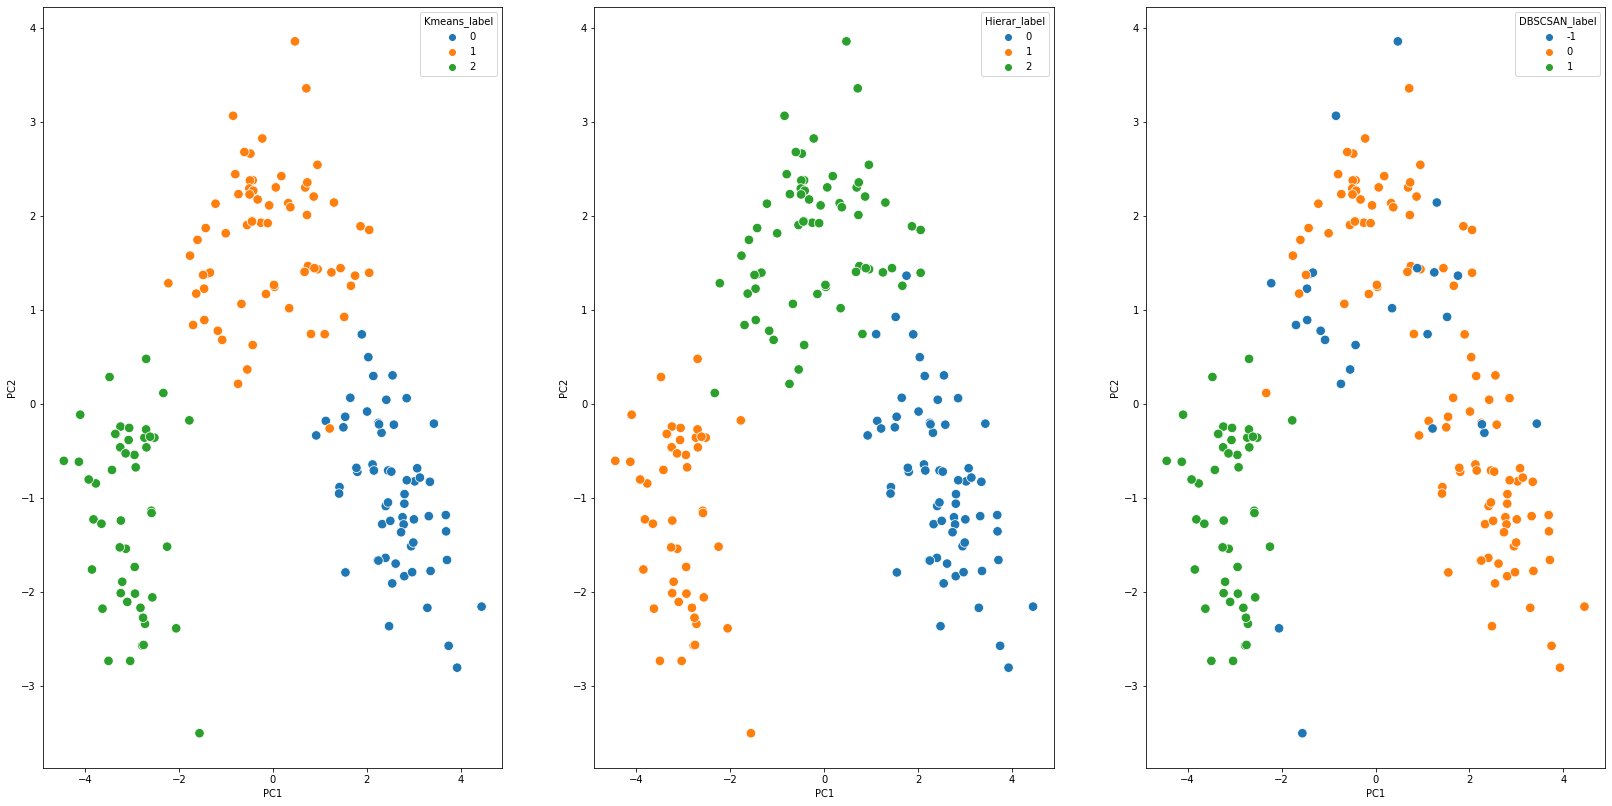

In [135]:
# set the plot size
plt.figure(figsize = (28, 14))

# plot a scatterplot to visualize the clusters
# pass the 1st and 2nd principal component to the parameter 'x' and 'y' respectively
# pass the dataframe of PCA components to the parameter 'data'
# pass the size of the data points to the parameter 's'
# pass the cluster labels to the parameter 'hue' to display the clusters with different colors
# pass the required colors to the parameter 'palette'

# plot the first subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['Kmeans_label'], palette = 'tab10')

# plot the second subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,2)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['Hierar_label'], palette = 'tab10')

# plot the third subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,3)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()